In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [20]:
clean_df = df.copy()

In [21]:
clean_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
clean_df.info()
clean_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
clean_df.drop_duplicates(subset=["CustomerId","Surname","CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"])
clean_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
clean_df['Surname'].str.replace("[a-zA-Z0-9]", "",regex=True).unique()

array(['', '?', "'", ' ', '-', '  '], dtype=object)

In [25]:
clean_df['Surname'] = df['Surname'].str.replace(r"[\s!?\.,@^']+", '', regex=True)  
clean_df.head(11)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [26]:
clean_df["Surname"] = clean_df["Surname"].str.capitalize()
clean_df["Geography"] = clean_df["Geography"].str.capitalize()
clean_df["Gender"] = clean_df["Gender"].str.capitalize()
clean_df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


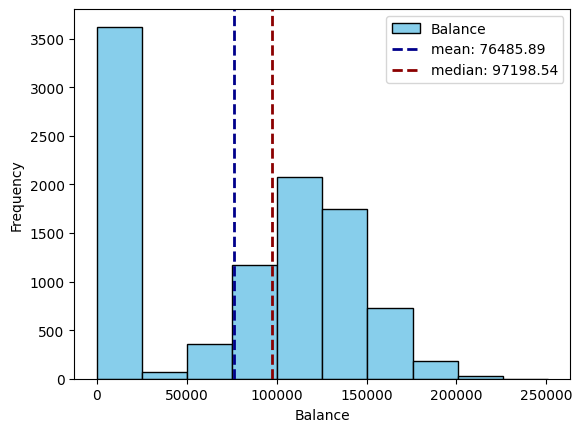

In [27]:
mean_value = clean_df["Balance"].mean()
median_value = clean_df["Balance"].median()

ax = clean_df["Balance"].plot(kind='hist', bins=10, color="skyblue", edgecolor="black")

ax.set_ylabel("Frequency")
ax.set_xlabel("Balance")

ax.axvline(mean_value, color='darkblue', linestyle='dashed', linewidth=2, label=f'mean: {mean_value:.2f}')
ax.axvline(median_value, color='darkred', linestyle='dashed', linewidth=2, label=f'median: {median_value:.2f}')


ax.legend()

plt.show()

In [28]:
np.mean(np.abs(clean_df["Balance"]- mean_value))

56660.7119648656

In [29]:
np.median(np.abs(clean_df["Balance"]- median_value))

46766.78999999998

In [30]:
# Total Services
clean_df['TotalServices'] = clean_df['NumOfProducts'] + clean_df['HasCrCard']

# Tenure in Months
clean_df['TenureMonths'] = clean_df['Tenure'] * 12



In [31]:
clean_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,TotalServices,TenureMonths
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,24
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,12
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4,96
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2,12
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,3,60
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,2,120
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,84
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,3,36


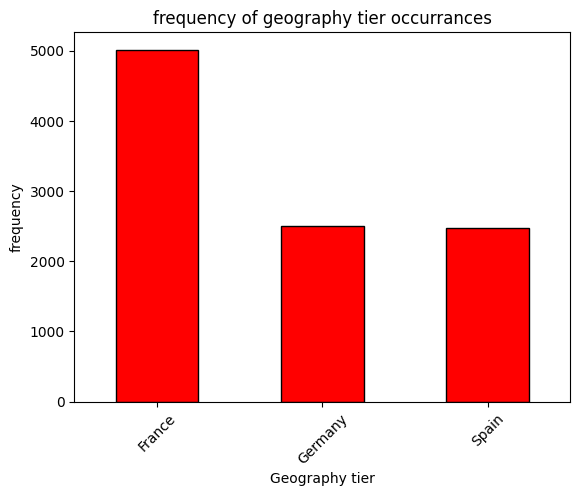

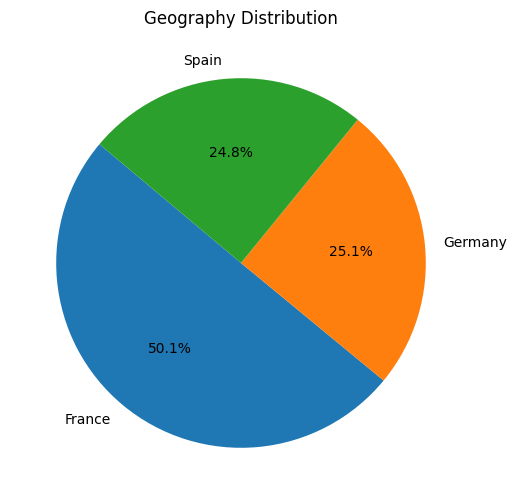

In [32]:
count_geography = clean_df["Geography"].value_counts()

count_geography.plot(kind="bar", color="red", edgecolor="black")
plt.xlabel("Geography tier")
plt.ylabel("frequency")
plt.title("frequency of geography tier occurrances")
plt.xticks(rotation=45)
plt.show()

geography_counts = df['Geography'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Geography Distribution')
plt.show()

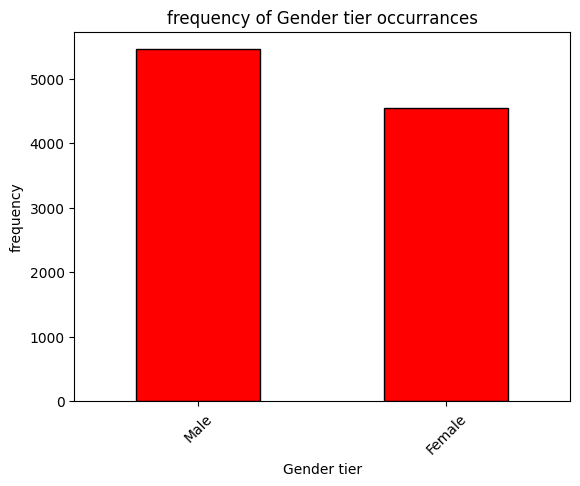

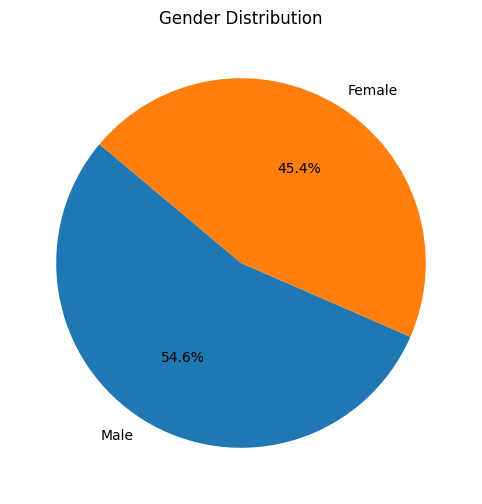

In [33]:
count_Gender = clean_df["Gender"].value_counts()

count_Gender.plot(kind="bar", color="red", edgecolor="black")
plt.xlabel("Gender tier")
plt.ylabel("frequency")
plt.title("frequency of Gender tier occurrances")
plt.xticks(rotation=45)
plt.show()

Gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

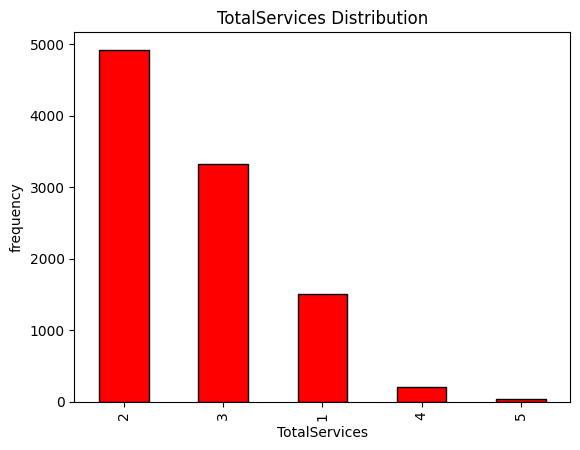

In [39]:
count_TotalServices = clean_df["TotalServices"].value_counts()

count_TotalServices.plot(kind="bar", color="red", edgecolor="black")
plt.xlabel("TotalServices")
plt.ylabel("frequency")
plt.title('TotalServices Distribution')
plt.show()



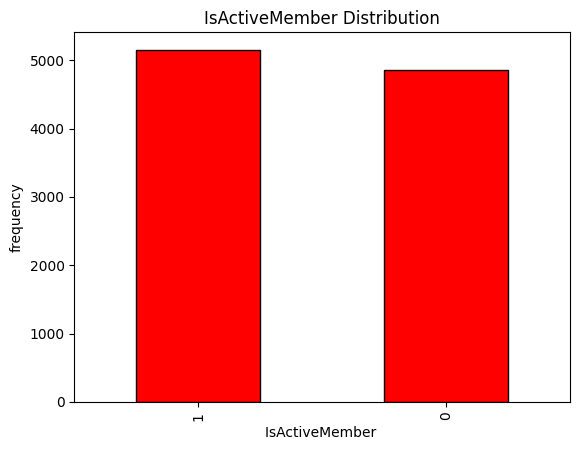

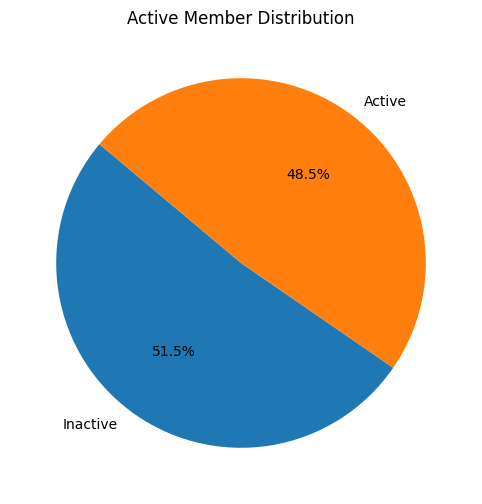

In [40]:
count_IsActiveMember = clean_df["IsActiveMember"].value_counts()

count_IsActiveMember.plot(kind="bar", color="red", edgecolor="black")
plt.xlabel("IsActiveMember ")
plt.ylabel("frequency")
plt.title('IsActiveMember Distribution')
plt.show()



# Pie chart for IsActiveMember
active_member= df['IsActiveMember'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(active_member, labels=['Inactive', 'Active'], autopct='%1.1f%%', startangle=140)
plt.title('Active Member Distribution')
plt.show()

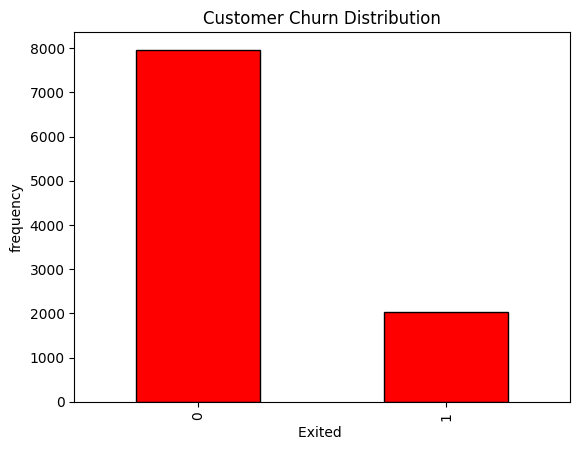

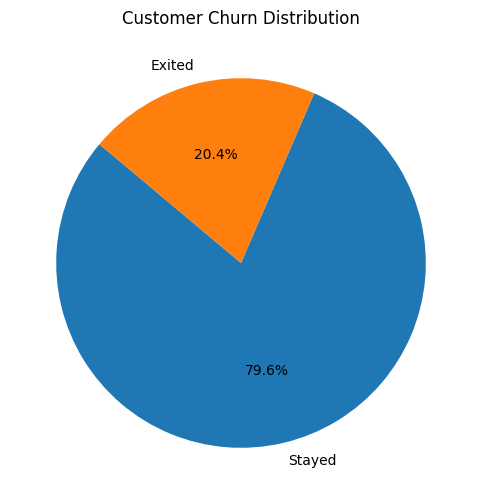

In [37]:
count_Exited = clean_df["Exited"].value_counts()

count_Exited.plot(kind="bar", color="red", edgecolor="black")
plt.xlabel("Exited ")
plt.ylabel("frequency")
plt.title('Customer Churn Distribution')
plt.show()





# Pie chart for Exited
exited = df['Exited'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(exited, labels=['Stayed', 'Exited'], autopct='%1.1f%%', startangle=140)
plt.title('Customer Churn Distribution')
plt.show()